In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Report

In [177]:
data_report = pd.read_csv('ag_report.csv')
data_report.head()
#imported 'data report' dataframe 

,uid,photo_id,report_id,comment,created
0,3124.0,180740,1,no photo: picture deleted by its owner,2015-11-10 23:29:47
1,1.0,27013,2,no photo: the photo might have been deleted fr...,2015-12-13 18:28:17
2,1.0,161337,3,no photo: the photo might have been deleted fr...,2015-12-13 18:27:58
3,493.0,165602,4,no photo: picture deleted by its owner,2015-08-23 23:00:15
4,493.0,167918,5,no photo: picture deleted by its owner,2015-08-23 22:59:36


In [144]:
data_report.describe()
#describing the data - to view some basic statistical details

,uid,photo_id,report_id
count,1267.000000,1272.000000,1272.00000
mean,1753.405683,155360.154874,636.50000
std,1624.821839,66749.353359,367.33908
min,1.000000,1.000000,1.00000
25%,1.000000,106671.000000,318.75000
50%,1549.000000,166321.500000,636.50000
75%,3371.000000,208981.250000,954.25000
max,4433.000000,255086.000000,1272.00000


In [145]:
df = data_report.report_id.groupby([data_report.comment.str.strip("'")]).nunique()
print (df)

#shows and counts total unique values

comment
Cropping needed                                                                                   22
Cropping needed, Edited image                                                                      1
Edited image                                                                                      10
Edited image, None or More than one person                                                         1
None or More than one person                                                                       3
Please check rotation, crop and/or personal details                                                1
Rotation needed                                                                                    3
Rotation needed, Cropping needed                                                                   1
no data: age or birth year inaccurate                                                            152
no photo: photo not reachable                                                      

/home/criuser/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


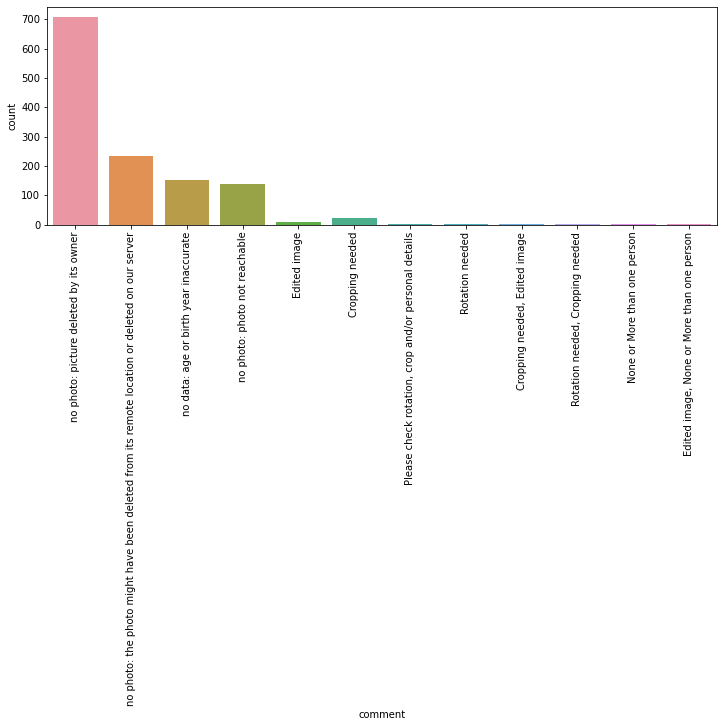

In [146]:
f,ax = plt.subplots(figsize=(12,4))
ax = sns.countplot(data_report.comment)
plt.xticks(rotation = 90)
plt.show()
#plotting the unique comments by count- how many in total per comment

In [147]:
data_report.isnull().sum()
#checking for missing values

uid          5
photo_id     0
report_id    0
comment      0
created      0
dtype: int64

In [148]:
data_report.info()
#displaying a more concise summary of the data also to see missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   uid        1267 non-null   float64
 1   photo_id   1272 non-null   int64  
 2   report_id  1272 non-null   int64  
 3   comment    1272 non-null   object 
 4   created    1272 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 49.8+ KB


In [149]:
print(data_report.columns)
#displaying the columns in the dataframe of data reports

Index(['uid', 'photo_id', 'report_id', 'comment', 'created'], dtype='object')


# Data Guess

In [ ]:
data_guess = pd.read_csv('ag_guess.csv')
data_guess
#imported 'data guess' dataframe 

In [ ]:
data_guess.isnull().sum()
#checking for missing values

In [ ]:
data_guess.info()
#displaying a more concise summary of the data also to see missing values

In [ ]:
data_guess.describe()
#describing the data - to view some basic statistical details

guesses= data_guess['outG'].unique()
guesses

# Data Quality 

In [ ]:
data_quality = pd.read_csv('ag_quality.csv')
data_quality
#imported 'data quality' dataset

In [ ]:
data_quality= data_quality.fillna(0)
data_quality
#filling missing values with 0 - fill NA/NaN values using the specified method

In [ ]:
data_quality.isnull().sum()
#finding missing values: none were found

In [ ]:
data_quality.describe()
#describing the data - to view some basic statistical details

In [ ]:
data_quality.info()
#displaying a more concise summary of the data also to see missing values

# Data Gamers

In [ ]:
data_gamers = pd.read_csv('ag_gamers.csv',encoding='latin1')
data_gamers
#imported 'data gamers' dataset

In [182]:
data_gamers.isnull().sum()
#finding the total number of missing values

uid                0
g                  0
ng                 0
points             0
gender           338
ethnicity        520
birth_country    523
birth_year       527
created            0
access             0
dtype: int64

In [ ]:
data_gamers1 = data_gamers[['g','ng', 'birth_country', 'points', 'gender', 'ethnicity', 'birth_year']]
data_gamers1
#created new dataframe named gamers1 to include the above attributes

In [ ]:
data_gamers1 = data_gamers1.fillna(0)
data_gamers1
#filling missing values with 0 - fill NA/NaN values using the specified method

In [ ]:
df2=data_gamers1.groupby(by=['ethnicity'])['g'].sum()
df2
#grouping ethinicities by their total count of correct guesses from the dataframe gamers

In [ ]:
df3=data_gamers1.groupby(by=['ethnicity'])['ng'].sum()
df3
#grouping ethinicities by their total count of total guesses from the dataframe gamers

In [ ]:
df2.plot(x="ethnicity", y=["g"])
plt.xticks(rotation = 45)
title=('Corect Guesses by Ethnicity')
plt.show()
#plotting graph of the correct guesses by ethnicity

In [ ]:
df3.plot(x="ethnicity", y=["ng"])
plt.xticks(rotation = 45)
plt.show()
#plotting the correct guesses by ethnicity

In [ ]:
data_gamers1.columns
#checking columns of dataframe gamers1

In [ ]:
sns.heatmap(data_gamers1.corr(), annot=True, cmap='RdBu_r',
            center=0, vmin=-1, vmax=1, linewidth=2, annot_kws={"fontsize":12},
            square=False, cbar=True).set_title('Correlation matrix', fontsize=24);
plt.yticks(rotation=0);

#correlation between correct guesses and total guesses

In [ ]:
g = sns.catplot(x='birth_country', y='g',data=data_gamers1, saturation=1.2,
                kind="bar", aspect=3.5, palette ="ch:s=3.0,rot=-.80")
plt.xticks(rotation = 90)
g.set_axis_labels('Country','Guesses')
g.fig.suptitle('Guesses by country',y=1.5)
#shows distribution of guesses by country.

ethnicity= data_gamers1['ethnicity'].unique()
ethnicity

Graph_gamers= data_gamers1.plot(data_gamers1['birth_country'],figsize=(9,7))
Graph_gamers.set_xlabel("birth_country")
Graph_gamers.set_ylabel("g","ng")
plt.show()

In [ ]:
data_gamers.isnull().sum()
#checking for missing values

# Data Photos

In [181]:
data_photos = pd.read_csv('ag_photos.csv',encoding='latin1')
data_photos.head()
#imported 'data photos' dataset

,uid,photo_id,age,relation,gender,ethnicity,birth_country,birth_year,death_age,created
0,4,243,26,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
1,4,449,49,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
2,4,556,25,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
3,4,699,48,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00
4,4,820,35,User,Male,Caucasian/White,France,NaN,NaN,2012-05-24 00:00:00


NameError: name 'data_photo' is not defined

In [ ]:
data_photos= data_photos.fillna(0)
data_photos
#filling missing values with 0 - fill NA/NaN values using the specified method

In [ ]:
relationship= data_photos['relation'].unique() 
relationship
#displaying the unique values in the dataframe's attribute relation

In [ ]:
rel=data_photos.groupby(by=['relation']).count()
rel
#most of the photos were uploaded of the user 

NameError: name 'hist' is not defined

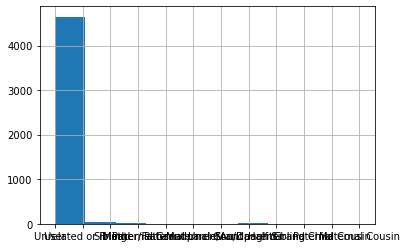

In [178]:
hist.plot=data_photos['relation'].hist(bins=10)
plt.xticks(rotation=90)
hist.plot.set_title(Picture_Relationship)
hist.plot.set_xlabel('relation')
hist.plot.set_ylabel('created')
plt.show()
#plotted histogram of relation count by  column 'created' to see who and how many times that person uploaded a photo

In [ ]:
country= data_photos['birth_country'].unique() 
country
#checking the unique values in birth_country

In [179]:
y=data_photos.groupby(by=['birth_country']).count()
pd.options.display.max_rows
y
#displays the total count of photos uploaded by country 

,uid,photo_id,age,relation,gender,ethnicity,birth_year,death_age,created
birth_country,,,,,,,,,
0,24,24,24,24,24,24,24,24,24
Alamo,2,2,2,2,2,2,2,2,2
Angola,1,1,1,1,1,1,1,1,1
Argentina,52,52,52,52,52,52,52,52,52
Armenia,1,1,1,1,1,1,1,1,1
Australia,29,29,29,29,29,29,29,29,29
Austria,31,31,31,31,31,31,31,31,31
Azerbaidijan,1,1,1,1,1,1,1,1,1
Bangladesh,4,4,4,4,4,4,4,4,4


In [ ]:
y.drop(['uid','gender', 'ethnicity', 'photo_id','age','relation','birth_year','death_age'], axis=1)
pd.set_option("display.max_rows", None, "display.max_columns", None)
y
#dropped all values except for created to see how the distribution of photos being uploaded based on country. 

In [ ]:
agee= data_photos['age'].unique() 
agee
#checked the unique values of different ages